In [2]:
'''1. MNIST Digit Recognition
* Dataset = https://www.kaggle.com/competitions/digit-recognizer/data
* Code = https://www.kaggle.com/code/abenezertesfaye/mnist-digit-recognition-with-cnn
* This kaggle note has following items:
* How to view an image?
* Image Augmentation'''

'1. MNIST Digit Recognition\n* Dataset = https://www.kaggle.com/competitions/digit-recognizer/data\n* Code = https://www.kaggle.com/code/abenezertesfaye/mnist-digit-recognition-with-cnn\n* This kaggle note has following items:\n* How to view an image?\n* Image Augmentation'

# Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [6]:
train_data  = pd.read_csv('/content/drive/MyDrive/COLAB DATASETS/MNIST DIGIT/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/COLAB DATASETS/MNIST DIGIT/test.csv')
sample_data  = pd.read_csv('/content/drive/MyDrive/COLAB DATASETS/MNIST DIGIT/sample_submission.csv')

# Data Prepocessing

In [8]:
# Print first five records of train dataset
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Print information of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
# Print first five records of test dataset
test_data.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Calculate the information of test dataset
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [12]:
# See the null values in datasets
print("Null values in train dataset :", train_data.isnull().sum().sum())
print("\nNull values in test dataset :", test_data.isnull().sum().sum())


Null values in train dataset : 0

Null values in test dataset : 0


In [13]:
#  Calculate the dependent and independent varirable
X = train_data.drop('label', axis = 1)
Y = train_data['label']
X
Y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [14]:
# # Calculate the shape and size of dependent and independent variable
X.shape, Y.shape

((42000, 784), (42000,))

# Normalize the pixel values and reshape the data
# One hot encoding


In [15]:
X = X/255.0
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
test_data = test_data/255.0
test_data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Reshape data for CNN (28x28x1)
X = X.values.reshape(-1, 28, 28, 1) # Convert X to a NumPy array before reshaping
test = test_data.values.reshape(-1, 28, 28, 1) # Convert test_data to a NumPy array before reshaping

In [18]:
# One Hot Encoding
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, 10)

# **Train-Test Split**



In [19]:
# Split the data with train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# **Build the model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [22]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
#EarlyStopping , Learning rate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Train the model**

In [24]:

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=64, callbacks=[early_stopping])


Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.7514 - loss: 0.7602 - val_accuracy: 0.9715 - val_loss: 0.0969
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9546 - loss: 0.1533 - val_accuracy: 0.9781 - val_loss: 0.0663
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - accuracy: 0.9694 - loss: 0.1033 - val_accuracy: 0.9832 - val_loss: 0.0519
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9731 - loss: 0.0884 - val_accuracy: 0.9871 - val_loss: 0.0400
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 31s 59ms/step - accuracy: 0.9773 - loss: 0.0771 - val_accuracy: 0.9883 - val_loss: 0.0381
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9816 - loss: 0.0605 - val_accuracy: 0.9870 - val_loss: 0.0413
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9824 - loss: 0.0594 - val_accuracy: 0.9896 - val_loss: 0.0345
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.9842 - loss: 0.0489 - 

**Model Evoluation**

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.18%


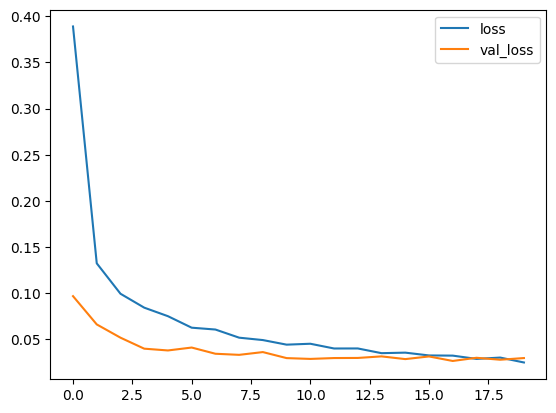

In [26]:
#  Plot the graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

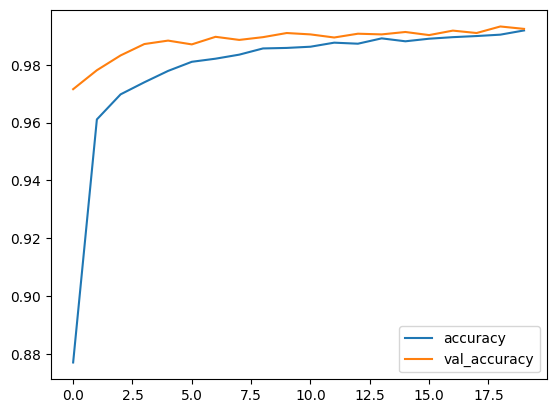

In [27]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])


**Data Augmentation**



In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_G = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05
)
data_G.fit(X_train)


In [32]:

History = model.fit(data_G.flow(X_train, Y_train, batch_size=64),
          validation_data=(X_test, Y_test),
          epochs=20,
          callbacks=[early_stopping,])



Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.9268 - loss: 0.2422 - val_accuracy: 0.9910 - val_loss: 0.0256
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.9625 - loss: 0.1301 - val_accuracy: 0.9919 - val_loss: 0.0264
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9665 - loss: 0.1090 - val_accuracy: 0.9919 - val_loss: 0.0228
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.9669 - loss: 0.1130 - val_accuracy: 0.9931 - val_loss: 0.0228
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9693 - loss: 0.1085 - val_accuracy: 0.9925 - val_loss: 0.0217
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.9745 - loss: 0.0882 - val_accuracy: 0.9931 - val_loss: 0.0193
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.9740 - loss: 0.0901 - val_accuracy: 0.9937 - val_loss: 0.0189
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9747 - loss: 0.0823 - 

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.40%


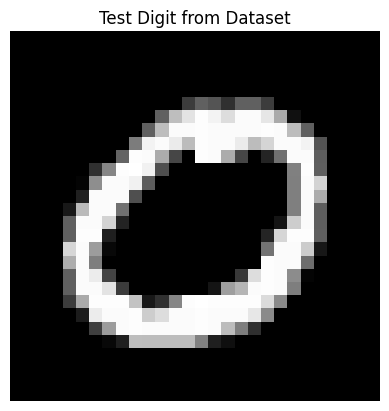

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


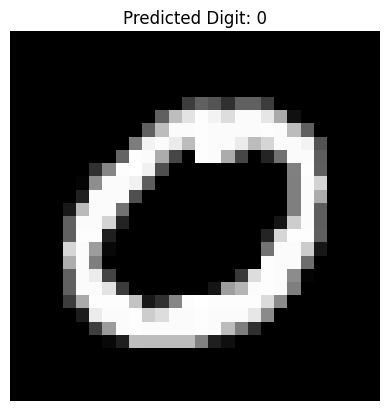

Predicted Digit: 0
Confidence Scores: [9.9999976e-01 7.2475395e-17 8.8237145e-10 1.5453032e-12 2.9773321e-12
 4.4714257e-11 6.4970473e-10 5.6613963e-12 1.1283561e-11 2.7828608e-07]


In [36]:
# Visualize an image from the test dataset
plt.imshow(test[8].reshape(28, 28), cmap='gray')
plt.title("Test Digit from Dataset")
plt.axis('off')
plt.show()

# Predict the digit
image_reshaped = test[8].reshape(1, 28, 28, 1)  # Ensure the image is reshaped correctly for model input
prediction = model.predict(image_reshaped)  # Get the prediction
predicted_digit = prediction.argmax()  # Extract the predicted digit
confidence_scores = prediction.flatten()  # Flatten the confidence scores array

# Display the image and prediction
plt.imshow(test[8].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

print(f"Predicted Digit: {predicted_digit}")
print(f"Confidence Scores: {confidence_scores}")